In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plot
%matplotlib inline

# Seaborn
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# Read the excel data
custDf = pd.read_csv("bank.csv")
custDf

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Feature Elimination
#### Some of the attributes are not related to churing like RowNumber, customer id and surname etc. Hence these can be dropped

In [3]:
custDf = custDf.drop(['RowNumber','CustomerId','Surname'],axis=1)
custDf

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# EDA

In [4]:
# Shape and size of the dataset
custDf.shape


(10000, 11)

In [5]:
# Check for null values if any
custDf.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [6]:
# unique values
custDf.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [7]:
# Data types
custDf.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
# 5 point summary of data
custDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [9]:
# is there any duplicates
custDf.duplicated().sum()

0

In [10]:
custDf.groupby(["Exited"]).mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


### No duplicate entries found
### No null values found
### Customers with low creidt score tend to churn
### Customers with high balance is also churning
### Aged customer are also tend to churn

# Univariate Analysis

<AxesSubplot:xlabel='Exited'>

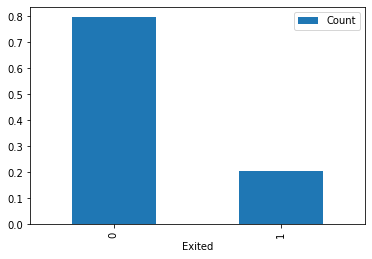

In [11]:
churnCtDf = custDf.groupby(['Exited']).size().reset_index(name='Count')
churnCtDf['Count'] = churnCtDf['Count']/churnCtDf['Count'].sum()
churnCtDf.plot(x='Exited',y='Count',kind='bar')

#### About 20% of the customers churned.

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

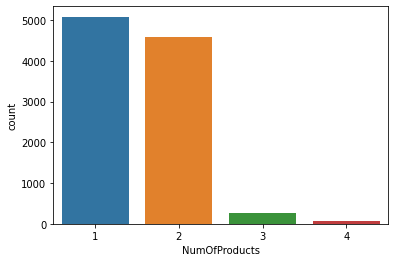

In [12]:
sns.countplot(x='NumOfProducts',data=custDf)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

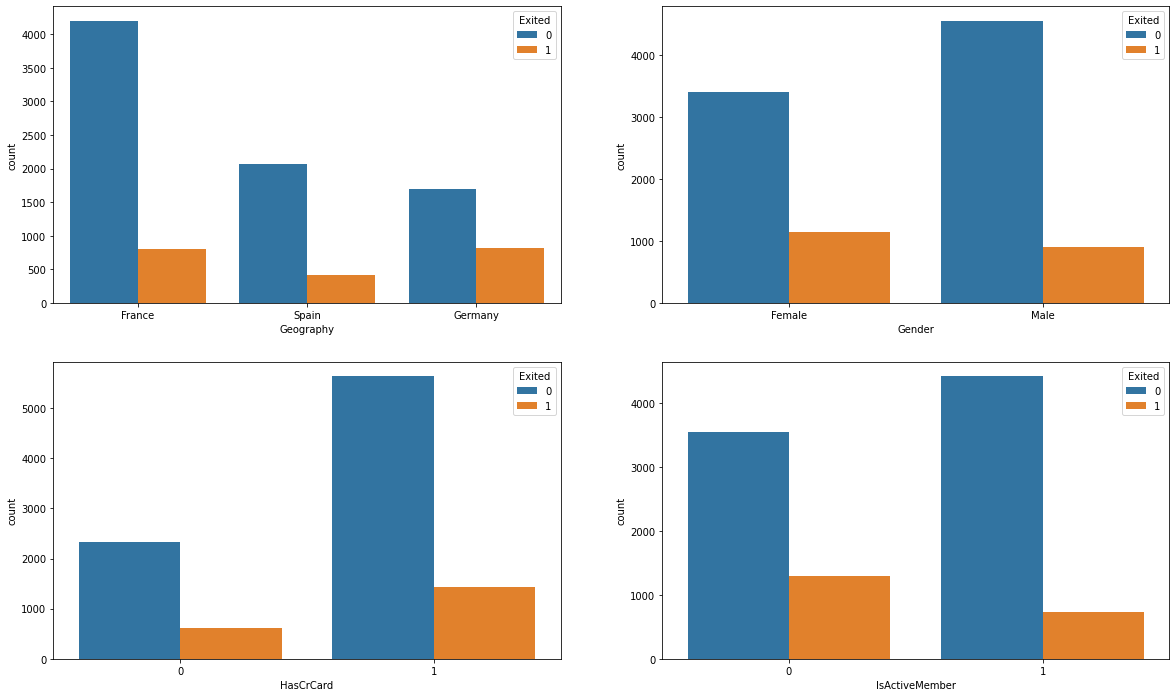

In [13]:
fix,axarr = plot.subplots(2,2, figsize=(20,12))
sns.countplot(x='Geography', hue = 'Exited',data = custDf, ax = axarr[0,0])
sns.countplot(x='Gender',    hue = 'Exited',data = custDf, ax = axarr[0,1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = custDf, ax = axarr[1,0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = custDf, ax = axarr[1,1])

#### Most of the customer data is from france. But compartively, number of churned customers are more in germany.
#### More female customers are churning than male
#### Most of the customers who churned has credit card
#### As expected, many of the inactive members are churned

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

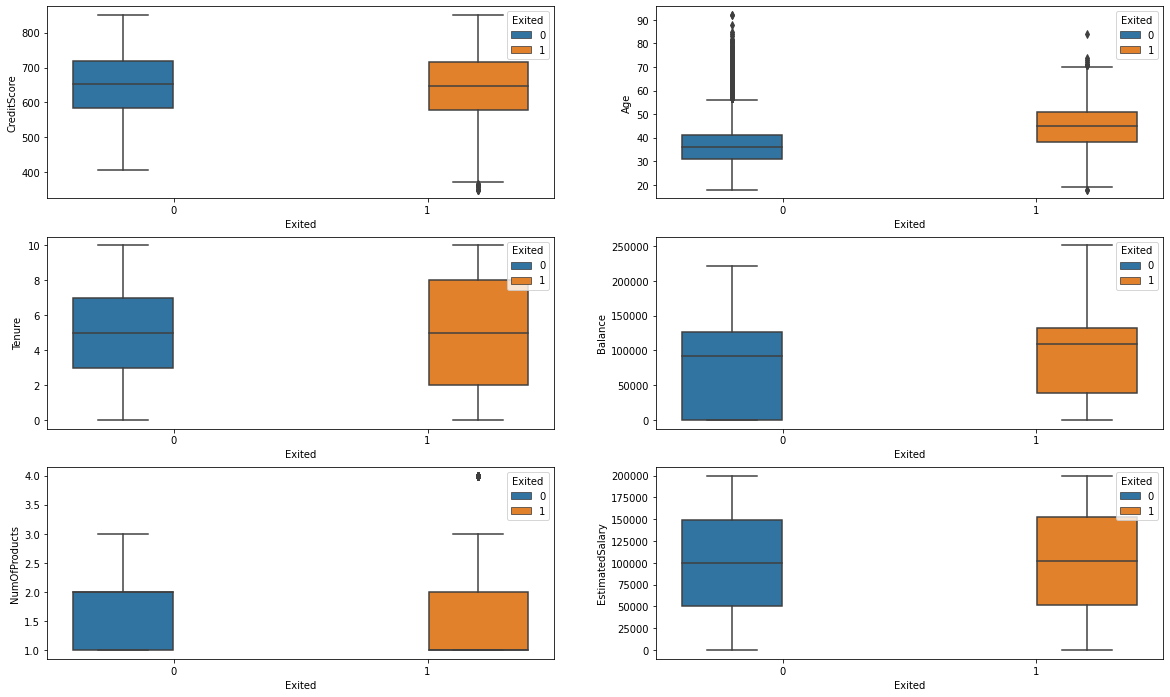

In [14]:
fix,axarr = plot.subplots(3,2, figsize=(20,12))
sns.boxplot(x='Exited', y = 'CreditScore', hue = 'Exited',data = custDf, ax = axarr[0,0])
sns.boxplot(x='Exited', y = 'Age', hue = 'Exited',data = custDf, ax = axarr[0,1])
sns.boxplot(x='Exited', y = 'Tenure', hue = 'Exited',data = custDf, ax = axarr[1,0])
sns.boxplot(x='Exited', y = 'Balance', hue = 'Exited',data = custDf, ax = axarr[1,1])
sns.boxplot(x='Exited', y = 'NumOfProducts', hue = 'Exited',data = custDf, ax = axarr[2,0])
sns.boxplot(x='Exited', y = 'EstimatedSalary', hue = 'Exited',data = custDf, ax = axarr[2,1])

####  No significant relationship between the credit score and the retained/churned customers
####  As said earlies, aged customers are tend to churn
####  Customer with high balance churning is really a trouble to bank
####  Number of products and estimated salary does not have any impact on churn

In [15]:
# Convert all the categorical variables to dummy variables
custDf = pd.get_dummies(custDf)
custDf

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


# Bivariate Analysis

### Pairplot across the variables

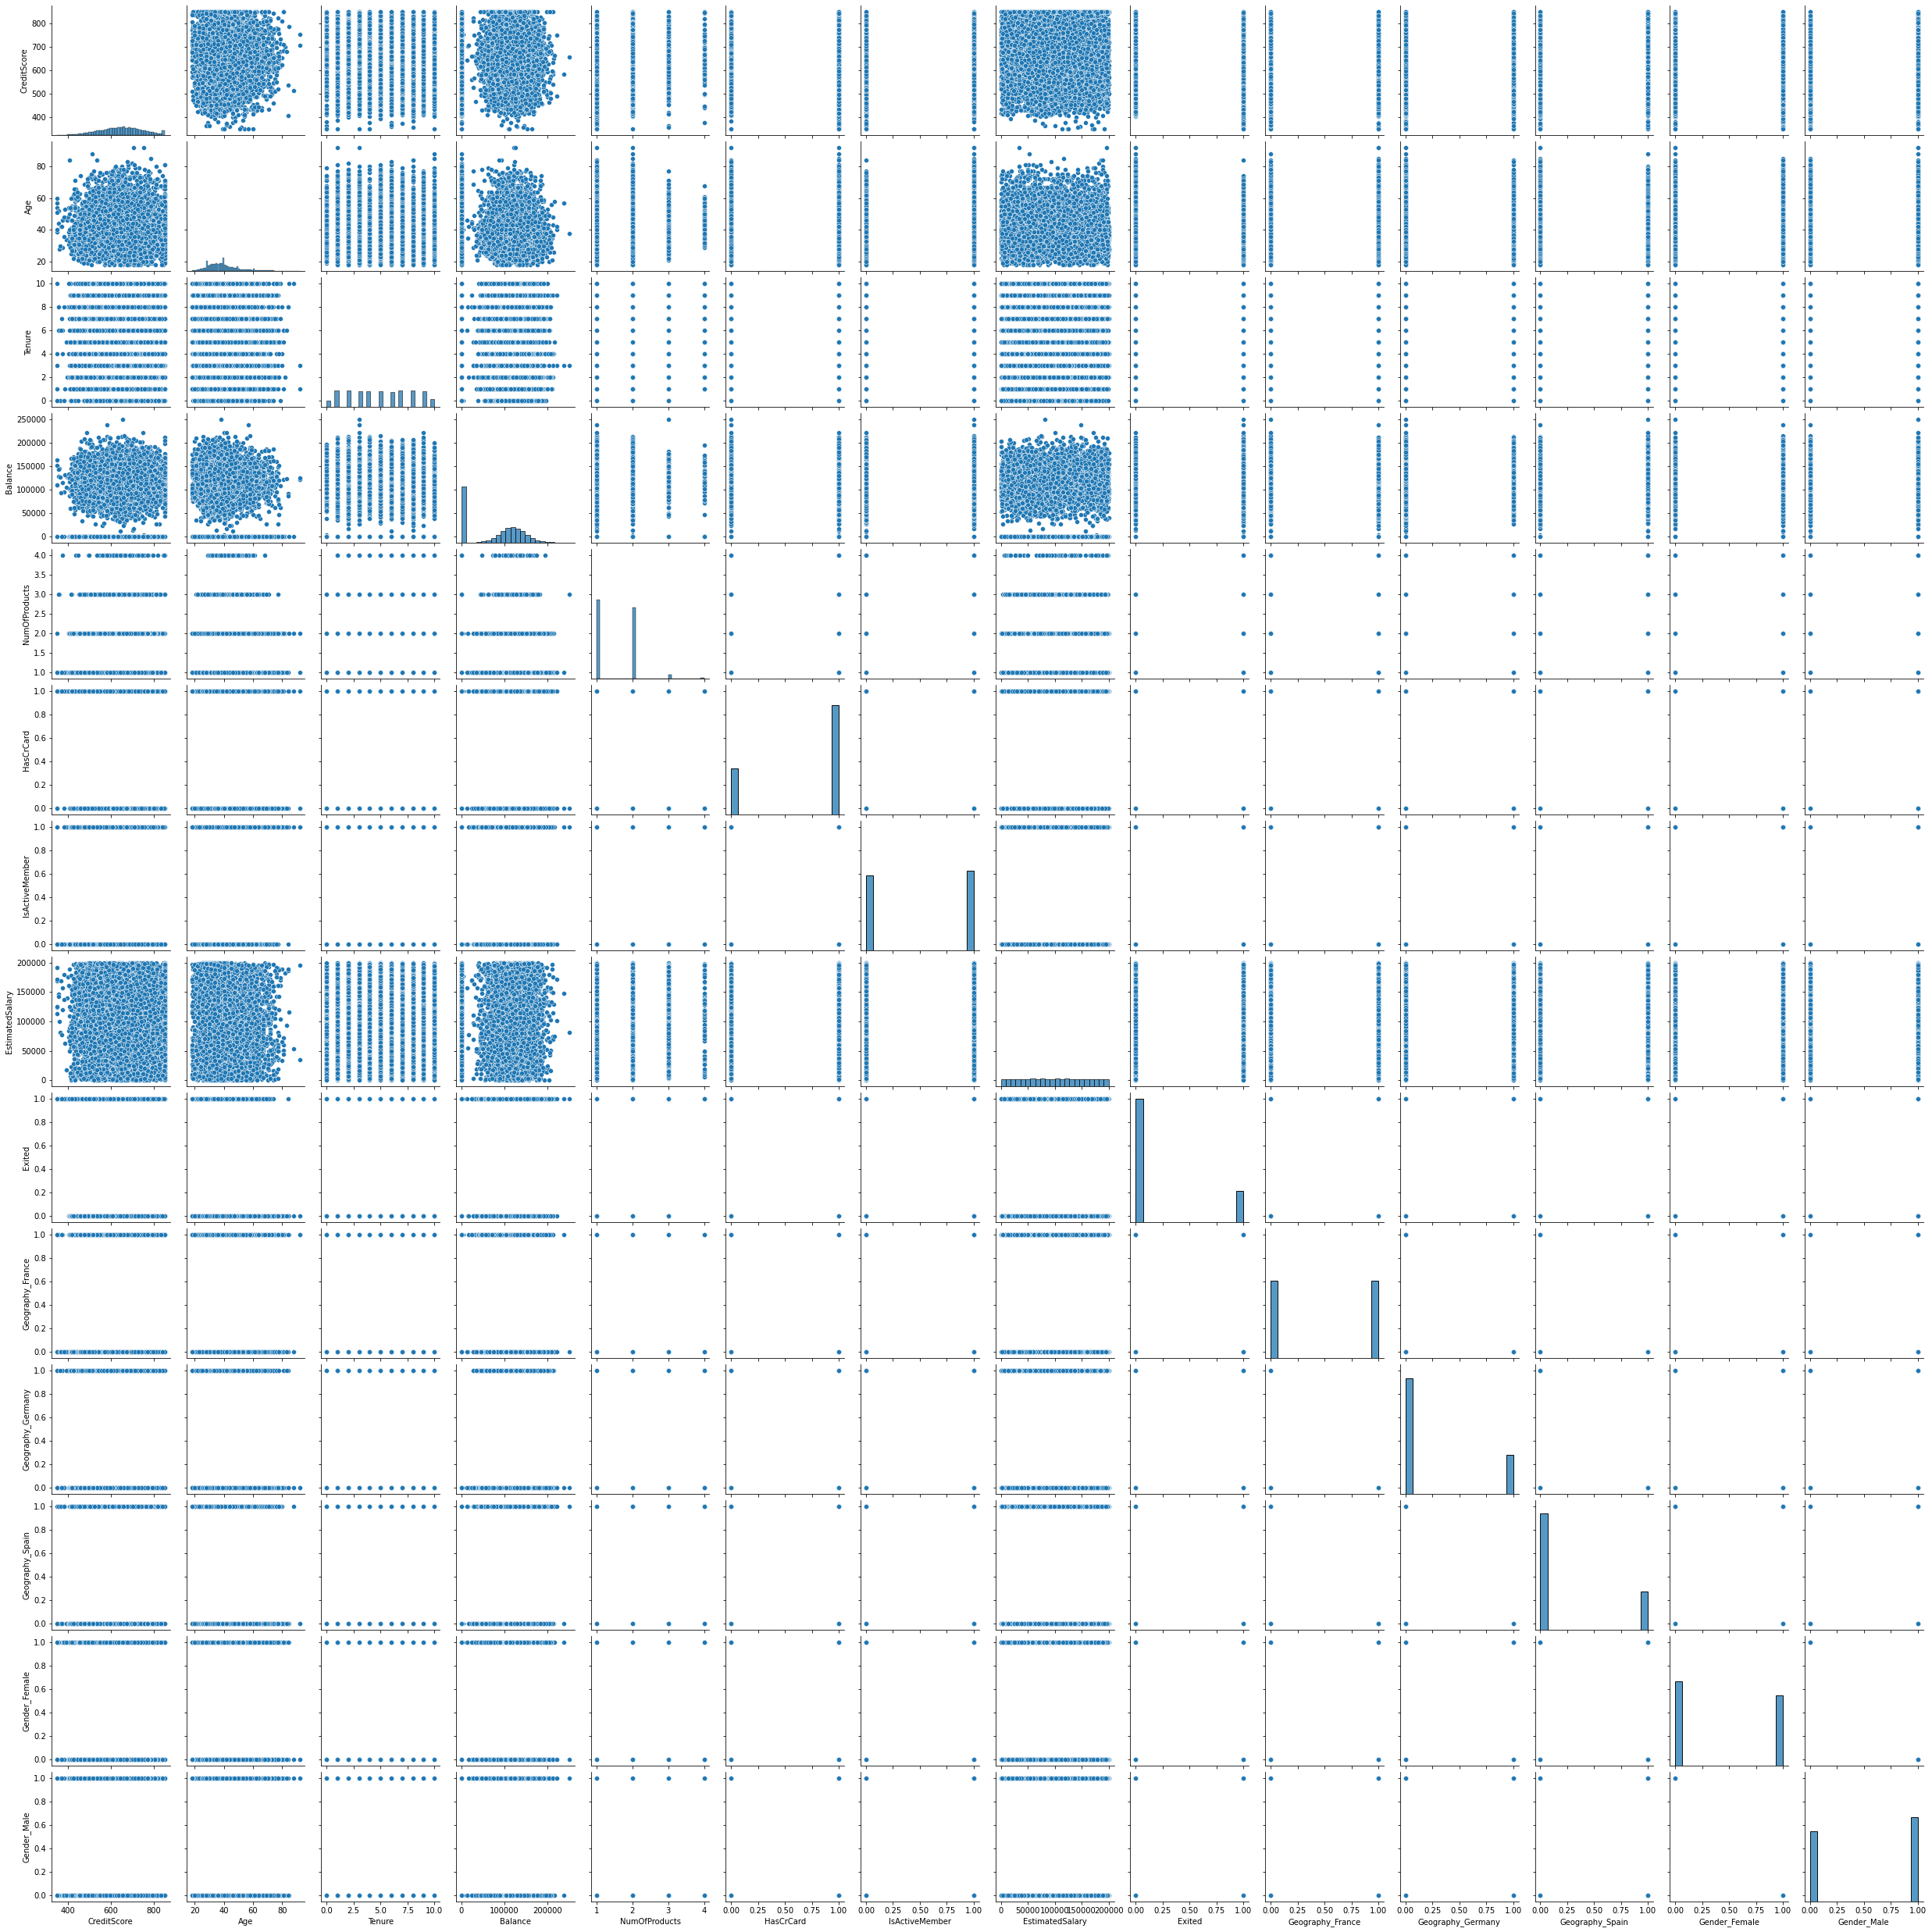

In [16]:
sns.pairplot(custDf);

### Correlation and its heatmap

In [17]:
custDf.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039,0.021859,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480,-0.005766,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,0.008112,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667,0.106512,-0.106512
Geography_France,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.580359,-0.575418,-0.006772,0.006772


<AxesSubplot:>

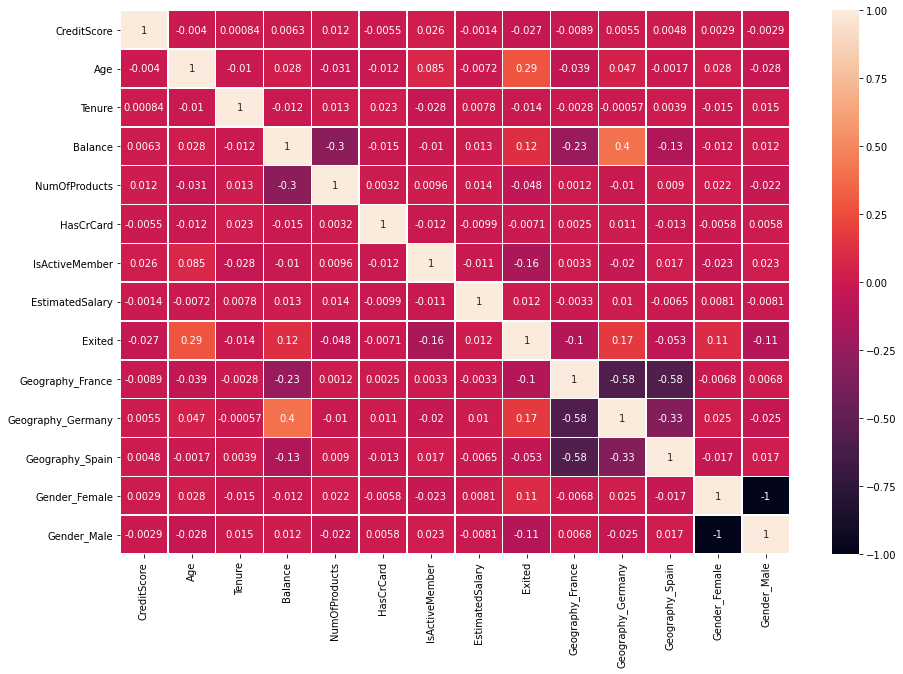

In [18]:
plot.figure(figsize = (15,10))
sns.heatmap(custDf.corr(), annot=True, linewidths=0.5)

## The following attributes have more correlation to the churn
### 1. Age
### 2. Geography = germany
### 3. Gender = female
### 4. Balance 

## Split train & test data

In [19]:
X = custDf.drop('Exited',axis=1)
Y = custDf.Exited

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.3, random_state = 5)
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2926,510,63,8,0.00,2,1,1,115291.86,1,0,0,0,1
4634,610,45,3,0.00,1,1,0,38276.84,0,0,1,1,0
416,487,61,5,110368.03,1,0,0,11384.45,0,1,0,1,0
6369,646,38,2,0.00,2,0,0,178752.73,1,0,0,1,0
7952,746,33,2,107868.14,2,1,1,146192.40,0,1,0,1,0


## Scale/normalize the data

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modelling

In [21]:
modelResults = []

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score

def EvalModel(classifier,model):
    
    # Predict with 0.5 as threshold value
    y_predict = classifier.predict(X_test)
    y_predict = (y_predict>= 0.5)
    
    # Print classification report
    print("")
    print("----------------------------------------------------------------------------------")
    from sklearn.metrics import classification_report
    print(classification_report(Y_test.astype('int'), y_predict.astype('int')))
    print("----------------------------------------------------------------------------------")
    
    # Print accuracy score
    print("")
    accScore    = accuracy_score(y_predict.astype('int'),Y_test.astype('int'))
    recallScore = recall_score(y_predict.astype('int'),Y_test.astype('int'))
    print("Accuracy = ",accScore)
    print("Recall   = ",recallScore)
    res = (accScore, recallScore, classifier, model, y_predict)
    modelResults.append(res)
    

## Model1: 

In [23]:
nn_classifier_1 = Sequential()

nn_classifier_1.add(Dense(units = 16, activation = 'relu',input_dim = 13))
nn_classifier_1.add(Dense(units = 12, activation = 'tanh'))
nn_classifier_1.add(Dense(units = 1,  activation = 'sigmoid'))
nn_classifier_1.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics=['accuracy'])
model_1=nn_classifier_1.fit(X_train, Y_train ,validation_split=0.33, batch_size = 10, epochs = 100)

Train on 4689 samples, validate on 2311 samples
Epoch 1/100
4689/4689 [==============================] - 1s 197us/step - loss: 0.5510 - accuracy: 0.7637 - val_loss: 0.5033 - val_accuracy: 0.7992
Epoch 2/100
4689/4689 [==============================] - 1s 154us/step - loss: 0.4960 - accuracy: 0.7919 - val_loss: 0.4799 - val_accuracy: 0.7997
Epoch 3/100
4689/4689 [==============================] - 1s 152us/step - loss: 0.4750 - accuracy: 0.7929 - val_loss: 0.4621 - val_accuracy: 0.8035
Epoch 4/100
4689/4689 [==============================] - 1s 151us/step - loss: 0.4588 - accuracy: 0.8021 - val_loss: 0.4505 - val_accuracy: 0.8087
Epoch 5/100
4689/4689 [==============================] - 1s 151us/step - loss: 0.4473 - accuracy: 0.8061 - val_loss: 0.4419 - val_accuracy: 0.8105
Epoch 6/100
4689/4689 [==============================] - 1s 153us/step - loss: 0.4390 - accuracy: 0.8068 - val_loss: 0.4358 - val_accuracy: 0.8157
Epoch 7/100
4689/4689 [==============================] - 1s 155us/step

4689/4689 [==============================] - 1s 156us/step - loss: 0.3288 - accuracy: 0.8646 - val_loss: 0.3334 - val_accuracy: 0.8672
Epoch 57/100
4689/4689 [==============================] - 1s 156us/step - loss: 0.3282 - accuracy: 0.8671 - val_loss: 0.3343 - val_accuracy: 0.8685
Epoch 58/100
4689/4689 [==============================] - 1s 158us/step - loss: 0.3279 - accuracy: 0.8627 - val_loss: 0.3332 - val_accuracy: 0.8663
Epoch 59/100
4689/4689 [==============================] - 1s 152us/step - loss: 0.3276 - accuracy: 0.8667 - val_loss: 0.3339 - val_accuracy: 0.8719
Epoch 60/100
4689/4689 [==============================] - 1s 154us/step - loss: 0.3274 - accuracy: 0.8654 - val_loss: 0.3333 - val_accuracy: 0.8654
Epoch 61/100
4689/4689 [==============================] - 1s 153us/step - loss: 0.3274 - accuracy: 0.8648 - val_loss: 0.3324 - val_accuracy: 0.8667
Epoch 62/100
4689/4689 [==============================] - 1s 150us/step - loss: 0.3267 - accuracy: 0.8665 - val_loss: 0.3334 

In [24]:
EvalModel(nn_classifier_1,model_1)


----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2403
           1       0.65      0.48      0.55       597

    accuracy                           0.84      3000
   macro avg       0.76      0.71      0.73      3000
weighted avg       0.83      0.84      0.84      3000

----------------------------------------------------------------------------------

Accuracy =  0.8446666666666667
Recall   =  0.647191011235955


# To compile a model with a threshold , accuracy metrics can be created with the threshold as shown below

In [25]:
#nn_classifier_1.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5)])

## Model2:

In [26]:
from tensorflow.keras import optimizers
nn_classifier_2 = Sequential()

nn_classifier_2.add(Dense(units = 15, activation ='relu',input_dim = 13))
nn_classifier_2.add(Dense(units = 10, activation ='relu'))
nn_classifier_2.add(Dense(units = 1,  activation ='sigmoid'))

opt = optimizers.Adam(lr = 0.001)
nn_classifier_2.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])
model_2 =nn_classifier_2.fit(X_train, Y_train ,validation_split=0.33, batch_size = 20, epochs = 100)

Train on 4689 samples, validate on 2311 samples
Epoch 1/100
4689/4689 [==============================] - 1s 109us/step - loss: 0.5124 - accuracy: 0.7752 - val_loss: 0.4516 - val_accuracy: 0.8070
Epoch 2/100
4689/4689 [==============================] - 0s 84us/step - loss: 0.4437 - accuracy: 0.8070 - val_loss: 0.4329 - val_accuracy: 0.8191
Epoch 3/100
4689/4689 [==============================] - 0s 81us/step - loss: 0.4272 - accuracy: 0.8170 - val_loss: 0.4203 - val_accuracy: 0.8230
Epoch 4/100
4689/4689 [==============================] - 0s 84us/step - loss: 0.4161 - accuracy: 0.8194 - val_loss: 0.4102 - val_accuracy: 0.8304
Epoch 5/100
4689/4689 [==============================] - 0s 85us/step - loss: 0.4048 - accuracy: 0.8292 - val_loss: 0.3999 - val_accuracy: 0.8347
Epoch 6/100
4689/4689 [==============================] - 0s 83us/step - loss: 0.3954 - accuracy: 0.8281 - val_loss: 0.3902 - val_accuracy: 0.8373
Epoch 7/100
4689/4689 [==============================] - 0s 85us/step - los

4689/4689 [==============================] - 0s 83us/step - loss: 0.3243 - accuracy: 0.8656 - val_loss: 0.3337 - val_accuracy: 0.8680
Epoch 57/100
4689/4689 [==============================] - 0s 86us/step - loss: 0.3244 - accuracy: 0.8652 - val_loss: 0.3356 - val_accuracy: 0.8672
Epoch 58/100
4689/4689 [==============================] - 0s 84us/step - loss: 0.3249 - accuracy: 0.8654 - val_loss: 0.3363 - val_accuracy: 0.8680
Epoch 59/100
4689/4689 [==============================] - 0s 85us/step - loss: 0.3243 - accuracy: 0.8654 - val_loss: 0.3357 - val_accuracy: 0.8676
Epoch 60/100
4689/4689 [==============================] - 0s 84us/step - loss: 0.3240 - accuracy: 0.8637 - val_loss: 0.3380 - val_accuracy: 0.8676
Epoch 61/100
4689/4689 [==============================] - 0s 87us/step - loss: 0.3244 - accuracy: 0.8659 - val_loss: 0.3366 - val_accuracy: 0.8654
Epoch 62/100
4689/4689 [==============================] - 0s 84us/step - loss: 0.3230 - accuracy: 0.8665 - val_loss: 0.3361 - val_a

In [27]:
EvalModel(nn_classifier_2,model_2)


----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2403
           1       0.69      0.49      0.57       597

    accuracy                           0.85      3000
   macro avg       0.78      0.72      0.74      3000
weighted avg       0.84      0.85      0.84      3000

----------------------------------------------------------------------------------

Accuracy =  0.8533333333333334
Recall   =  0.6855791962174941


In [28]:
modelResults

[(0.8446666666666667,
  0.647191011235955,
  array([[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]])),
 (0.8533333333333334,
  0.6855791962174941,
  array([[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]]))]

## Model3: 

In [29]:
nn_classifier_3 = Sequential()

nn_classifier_3.add(Dense(units = 20, activation ='relu',input_dim = 13))
nn_classifier_3.add(Dense(units = 12, activation ='tanh'))
nn_classifier_3.add(Dense(units = 6, activation  ='relu'))
nn_classifier_3.add(Dense(units = 1,  activation ='sigmoid'))

nn_classifier_3.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics=['accuracy'])
model_3=nn_classifier_3.fit(X_train, Y_train ,validation_split=0.33, batch_size = 20, epochs = 100)

Train on 4689 samples, validate on 2311 samples
Epoch 1/100
4689/4689 [==============================] - 1s 114us/step - loss: 0.5850 - accuracy: 0.7328 - val_loss: 0.4999 - val_accuracy: 0.7936
Epoch 2/100
4689/4689 [==============================] - 0s 81us/step - loss: 0.4928 - accuracy: 0.7897 - val_loss: 0.4711 - val_accuracy: 0.7953
Epoch 3/100
4689/4689 [==============================] - 0s 81us/step - loss: 0.4719 - accuracy: 0.7946 - val_loss: 0.4544 - val_accuracy: 0.8005
Epoch 4/100
4689/4689 [==============================] - 0s 82us/step - loss: 0.4567 - accuracy: 0.8008 - val_loss: 0.4425 - val_accuracy: 0.8087
Epoch 5/100
4689/4689 [==============================] - 0s 81us/step - loss: 0.4460 - accuracy: 0.8010 - val_loss: 0.4344 - val_accuracy: 0.8170
Epoch 6/100
4689/4689 [==============================] - 0s 80us/step - loss: 0.4383 - accuracy: 0.8068 - val_loss: 0.4294 - val_accuracy: 0.8230
Epoch 7/100
4689/4689 [==============================] - 0s 82us/step - los

4689/4689 [==============================] - 0s 82us/step - loss: 0.3351 - accuracy: 0.8614 - val_loss: 0.3402 - val_accuracy: 0.8659
Epoch 57/100
4689/4689 [==============================] - 0s 84us/step - loss: 0.3348 - accuracy: 0.8614 - val_loss: 0.3391 - val_accuracy: 0.8646
Epoch 58/100
4689/4689 [==============================] - 0s 86us/step - loss: 0.3337 - accuracy: 0.8582 - val_loss: 0.3401 - val_accuracy: 0.8659
Epoch 59/100
4689/4689 [==============================] - 0s 88us/step - loss: 0.3331 - accuracy: 0.8588 - val_loss: 0.3396 - val_accuracy: 0.8689
Epoch 60/100
4689/4689 [==============================] - 0s 88us/step - loss: 0.3334 - accuracy: 0.8595 - val_loss: 0.3397 - val_accuracy: 0.8685
Epoch 61/100
4689/4689 [==============================] - 0s 85us/step - loss: 0.3324 - accuracy: 0.8597 - val_loss: 0.3385 - val_accuracy: 0.8667
Epoch 62/100
4689/4689 [==============================] - 0s 83us/step - loss: 0.3318 - accuracy: 0.8590 - val_loss: 0.3384 - val_a

In [30]:
EvalModel(nn_classifier_3,model_3)


----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2403
           1       0.63      0.49      0.55       597

    accuracy                           0.84      3000
   macro avg       0.76      0.71      0.73      3000
weighted avg       0.83      0.84      0.83      3000

----------------------------------------------------------------------------------

Accuracy =  0.8416666666666667
Recall   =  0.6303418803418803


In [31]:
# Find model with better score
bestModelRecallScore = 0.0
bestModel = ()
for p in modelResults:
    if(p[1] > bestModelRecallScore):
        bestModelRecallScore = p[1]
        bestModel = p
        

    

In [32]:
# Summary of the best model
print(bestModel[2].summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________
None


# Model Summary
## Tried with 3 different models and performance of the best model is evaluated

## Performance Evaluation with various metrics of best model

### Confusion Matrix

<AxesSubplot:>

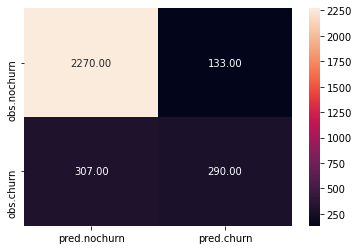

In [33]:
from sklearn.metrics import confusion_matrix
confMat = confusion_matrix(Y_test,bestModel[4])
sns.heatmap(confMat, annot=True,  fmt='.2f', xticklabels = ["pred.nochurn","pred.churn"] , yticklabels = ["obs.nochurn","obs.churn"] )

### Accuracy of train and test data

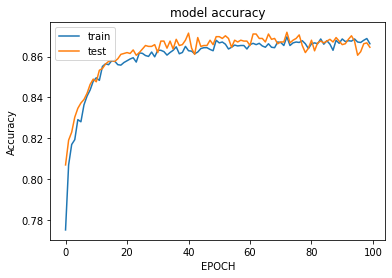

In [34]:
bestModel[3].history.keys()
plot.plot(bestModel[3].history['accuracy'])
plot.plot(bestModel[3].history['val_accuracy'])
plot.title('model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('EPOCH')
plot.legend(['train', 'test'], loc='upper left')
plot.show()

## Accuracy score

In [35]:
print("Accuracy of best model = ",bestModel[0])
print("Recall   of best model = ",bestModel[1])

Accuracy of best model =  0.8533333333333334
Recall   of best model =  0.6855791962174941
